Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7938 - loss: 0.6142 - val_accuracy: 0.8500 - val_loss: 0.4879
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.8722 - loss: 0.4278 - val_accuracy: 0.8813 - val_loss: 0.3682
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.8785 - loss: 0.3388 - val_accuracy: 0.8938 - val_loss: 0.2959
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.9038 - loss: 0.2585 - val_accuracy: 0.9000 - val_loss: 0.2684
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - accuracy: 0.8937 - loss: 0.2624 - val_accuracy: 0.9000 - val_loss: 0.2531
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - accuracy: 0.8884 - loss: 0.2592 - val_accuracy: 0.9000 - val_loss: 0.2475
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.9028 - loss: 0.2234 - val_accuracy: 0.9000 - val_loss: 0.2388
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.8830 - loss: 0.2415 - val_accuracy: 0.9000 - val_lo

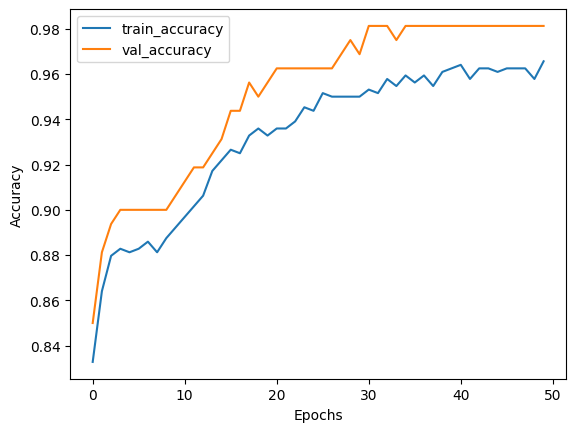

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7921/7921 ━━━━━━━━━━━━━━━━━━━━ 1s 170us/step


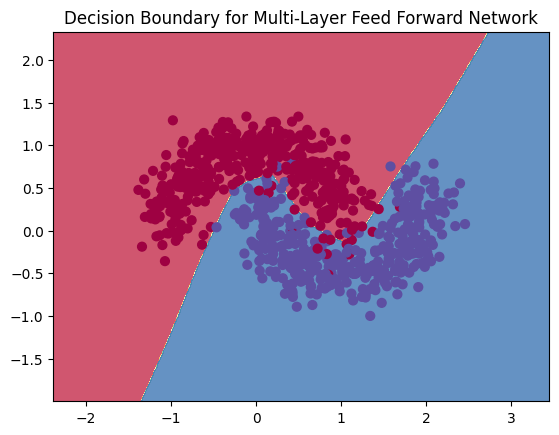

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

def load_dataset():
    # Using sklearn's make_moons dataset for demonstration
    from sklearn.datasets import make_moons
    X, Y = make_moons(n_samples=1000, noise=0.2, random_state=0)
    return X, Y

# Load dataset
X, Y = load_dataset()

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the multi-layer feed-forward neural network model
def build_model(input_dim):
    model = Sequential([
        Dense(units=64, activation='relu', input_dim=input_dim),
        Dense(units=64, activation='relu'),
        Dense(units=1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Build the model
model = build_model(input_dim=X_train.shape[1])

# Train the model
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Predict outcomes
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)

# Plotting decision boundary
def plot_decision_boundary(model, X, Y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z > 0.5).astype(int).reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)
    plt.title('Decision Boundary for Multi-Layer Feed Forward Network')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(model, X_train, Y_train)
